In [1]:
import pandas as pd


In [2]:
import numpy as np 

In [49]:
import matplotlib.pyplot as plt

In [50]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns

In [69]:
from scipy.stats import norm

In [70]:
import statistics 

In [88]:
df = pd.read_csv("Datosventas13.csv")
df

,ID,Num Order,Month Purchase,Client,Costumer type,Concept,Service,Quantity,Price,Cost,Total cost,Sale,Income,Fee,Revenue,Salesman
0,220101,1.0,enero,NYC,Logistica,Camisolas,Confección,65,280.0,125.0,8125.0,18200,10075.0,1.0,55.36%,Pedro
1,220102,2.0,enero,NYC,Logistica,Chalecos,Confección,30,230.0,115.0,3450.0,6900,3450.0,1.0,50.00%,Pedro
2,220103,3.0,enero,Transp Urgentes,Logistica,camisolas,Confección,15,280.0,125.0,1875.0,4200,2325.0,1.0,55.36%,Pedro
3,220104,4.0,enero,Transp Urgentes,Logistica,Chalecos,Confección,41,230.0,115.0,4715.0,9430,4715.0,1.0,50.00%,Pedro
4,220105,5.0,enero,NUEVOMEX,Logistica,camisolas,Confección,41,280.0,125.0,5125.0,11480,6355.0,1.0,55.36%,Pedro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,211265,68.0,diciembre,INTERMODAL,Logistica,taza negra,Serigrafía,15,85.0,20.0,300.0,1275,975.0,1.0,76.47%,Marco
908,211266,69.0,diciembre,INTERMODAL,Logistica,gorra sport,Bordado,30,135.0,45.0,1350.0,4050,2700.0,1.0,66.67%,Marco
909,211267,70.0,diciembre,Kayak,Industrial,Polo Advance,Bordado,35,290.0,155.0,5425.0,10150,4725.0,1.0,46.55%,Pedro
910,211268,71.0,diciembre,LAMSER,Industrial,Chaleco b,Confección,17,280.0,110.0,1870.0,4760,2890.0,1.0,60.71%,Marco


In [42]:
df.describe()

,ID,Num Order,Quantity,Price,Cost,Total cost,Sale,Income,Fee
count,9.200000e+02,910.000000,919.000000,918.000000,917.000000,920.000000,919.000000,920.000000,896.000000
mean,2.430372e+05,35.825275,47.602829,236.440450,124.962800,4403.571364,8523.787813,4068.567766,0.972098
std,2.406532e+05,23.824653,87.622519,236.987427,159.237136,6433.839977,12144.408584,6407.468961,0.237074
min,2.101010e+05,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-3400.000000,0.000000
25%,2.104568e+05,16.000000,12.000000,121.500000,43.000000,898.750000,2200.000000,1100.000000,1.000000
50%,2.108235e+05,33.000000,24.000000,230.000000,120.000000,2145.000000,4200.000000,2132.500000,1.000000
75%,2.111822e+05,52.000000,51.500000,285.000000,167.000000,5406.250000,10805.000000,4752.500000,1.000000
max,2.111114e+06,119.000000,1640.000000,6000.000000,4000.000000,72000.000000,139400.000000,113160.000000,2.000000


In [43]:
x = df.columns.tolist()
x.sort()
x

['Client',
 'Concept ',
 'Cost ',
 'Costumer type',
 'Fee',
 'ID ',
 'Income ',
 'Month Purchase',
 'Num Order',
 'Price ',
 'Quantity',
 'Revenue ',
 'Sale ',
 'Salesman ',
 'Service ',
 'Total cost ']

In [30]:
pd.pivot_table(df,
               index = "Costumer type", #
               aggfunc = 'sum', #funciones como en excel
               values = "Sale ", #Solo imprime los valores que queremos 
               margins = True,
               columns = "Month Purchase" #sumlev es una columna, no es una formula
              )

Month Purchase,abril,abril,agosto,agosto,diciembre,diciembre,enero,enero,febrero,febrero,...,marzo,mayo,mayo,noviembre,noviembre,octubre,octubre,septiembre,septiembre,All
Costumer type,,,,,,,,,,,,,,,,,,,,,
Constructora,NaN,NaN,9285.0,NaN,74280.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,51755.0,NaN,NaN,NaN,NaN,NaN,135320.0
Corporativo,165275.0,NaN,19240.0,NaN,117001.0,NaN,30715.0,NaN,161150.0,NaN,...,NaN,101920.0,NaN,140035.0,NaN,16200.0,NaN,4700.0,NaN,855111.0
Distribuidor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32300.0,NaN,NaN,NaN,NaN,NaN,32300.0
Entretenimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10000.0,NaN,5850.0,NaN,NaN,NaN,54850.0
Escuela,21709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12250.0,NaN,...,NaN,NaN,NaN,36400.0,NaN,25430.0,NaN,23795.0,NaN,119584.0
Industrial,121484.0,NaN,408234.0,NaN,204580.0,NaN,383560.0,NaN,226210.0,NaN,...,NaN,237936.0,NaN,219291.0,NaN,263757.0,NaN,355839.0,NaN,3191540.0
Limpieza,NaN,NaN,NaN,NaN,NaN,NaN,1900.0,NaN,NaN,NaN,...,NaN,10750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12650.0
Logistica,22340.0,30520.0,63050.0,43850.0,77975.0,40270.0,143035.0,39820.0,180840.0,62200.0,...,51180.0,92435.0,11730.0,39340.0,21080.0,103252.0,60160.0,118790.0,57750.0,1615487.0
Medicina,NaN,NaN,NaN,NaN,NaN,NaN,45150.0,NaN,8150.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53300.0


In [33]:
pd.pivot_table(df,
               index = ["Costumer type", "Client"], #
               aggfunc = 'sum', 
               values = "Sale ",  
               margins = True,
               columns = "Month Purchase" 
              )


Month Purchase                     abril   abril     agosto  agosto   \
Costumer type Client                                                   
Constructora  4XT                    NaN      NaN    9285.0      NaN   
              Cons. Velázquez        NaN      NaN       NaN      NaN   
              Nueve Noventa          NaN      NaN       NaN      NaN   
              RT CONSTRUCC           NaN      NaN       NaN      NaN   
              dip Arq.               NaN      NaN       NaN      NaN   
...                                  ...      ...       ...      ...   
Seguridad     Culmen                 NaN      NaN       NaN      NaN   
              IMPERIUM               NaN      NaN       NaN      NaN   
              SEVIPE              3180.0      NaN       NaN      NaN   
              Sevipe                 NaN      NaN       NaN      NaN   
All                             393954.0  30520.0  533375.0  43850.0   

Month Purchase                  diciembre  diciembre      enero   enero   \
Costumer type Client                                                       
Constructora  4XT                     NaN         NaN       NaN      NaN   
              Cons. Velázquez     74280.0         NaN       NaN      NaN   
              Nueve Noventa           NaN         NaN       NaN      NaN   
              RT CONSTRUCC            NaN         NaN       NaN      NaN   
              dip Arq.                NaN         NaN       NaN      NaN   
...                                   ...         ...       ...      ...   
Seguridad     Culmen                  NaN         NaN       NaN      NaN   
              IMPERIUM                NaN         NaN       NaN      NaN   
              SEVIPE                  NaN         NaN   26651.0      NaN   
              Sevipe                  NaN         NaN       NaN      NaN   
All                              556936.0     40270.0  799047.0  39820.0   

Month Purchase                   febrero  febrero   ...   marzo       mayo  \
Costumer type Client                                ...                      
Constructora  4XT                    NaN       NaN  ...      NaN       NaN   
              Cons. Velázquez        NaN       NaN  ...      NaN       NaN   
              Nueve Noventa          NaN       NaN  ...      NaN       NaN   
              RT CONSTRUCC           NaN       NaN  ...      NaN       NaN   
              dip Arq.               NaN       NaN  ...      NaN       NaN   
...                                  ...       ...  ...      ...       ...   
Seguridad     Culmen              8700.0       NaN  ...      NaN       NaN   
              IMPERIUM               NaN       NaN  ...      NaN       NaN   
              SEVIPE              5625.0       NaN  ...      NaN    4000.0   
              Sevipe                 NaN       NaN  ...      NaN       NaN   
All                             703040.0   62200.0  ...  51180.0  588354.0   

Month Purchase                    mayo   noviembre  noviembre    octubre  \
Costumer type Client                                                       
Constructora  4XT                   NaN        NaN         NaN       NaN   
              Cons. Velázquez       NaN        NaN         NaN       NaN   
              Nueve Noventa         NaN    17755.0         NaN       NaN   
              RT CONSTRUCC          NaN    27600.0         NaN       NaN   
              dip Arq.              NaN     6400.0         NaN       NaN   
...                                 ...        ...         ...       ...   
Seguridad     Culmen                NaN        NaN         NaN       NaN   
              IMPERIUM              NaN        NaN         NaN       NaN   
              SEVIPE                NaN        NaN         NaN       NaN   
              Sevipe                NaN        NaN         NaN       NaN   
All                             11730.0   984127.0     21080.0  713679.0   

Month Purchase                  octubre   septiembre  septiembre      

In [46]:
df["Income "].describe()

count       920.000000
mean       4068.567766
std        6407.468961
min       -3400.000000
25%        1100.000000
50%        2132.500000
75%        4752.500000
max      113160.000000
Name: Income , dtype: float64

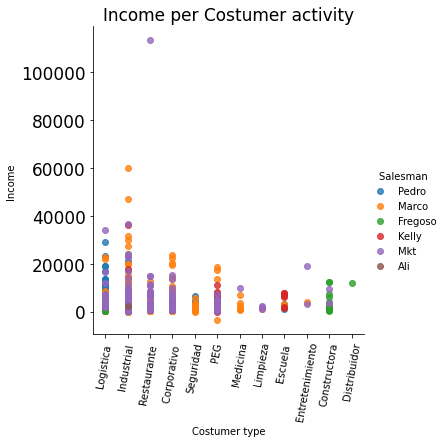

In [62]:
sns.lmplot (x= "Costumer type" ,
            y= "Income ",
            data = df,
            fit_reg= False, #quitar la linea de regresión
            hue = "Salesman " #identificar los puntos
           )
plt.xticks(rotation=80, fontsize=10)
plt.yticks(fontsize=17)
plt.title("Income per Costumer activity", fontsize=17)
plt.show()

In [104]:
df["Sale "].describe()

count       912.000000
mean       8541.631579
std       12153.955507
min         150.000000
25%        2230.000000
50%        4200.000000
75%       10830.000000
max      139400.000000
Name: Sale , dtype: float64

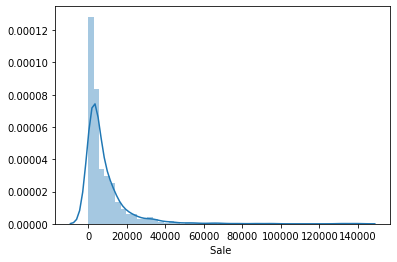

In [103]:
sns.distplot(df["Sale "])
plt.show()